# Desafio Prático - IGTI - Modulo 02 - Comp_Bikes_Mod
- Autor: Caio Gabriel de Moraes
- Data : 05/08/2020
- LinkedIn: https://www.linkedin.com/in/caio-moraes-8026a6158/

### Informações sobre o Desafio

O Desafio do Módulo 1 está disponível! Consulte a data de entrega no teste e em seu calendário.

Reserve um tempo para realizar a atividade, leia as orientações e enunciados com atenção. Em caso de dúvidas utilize o "Fórum de dúvidas do Desafio".

Para iniciá-lo clique em "Fazer teste". Você tem somente uma tentativa e não há limite de tempo definido para realizá-lo. Caso precise interromper a atividade, apenas deixe a página e, ao retornar, clique em "Retomar teste".

Clique em "Enviar teste" somente quando você concluí-lo. Antes de enviar confira todas as questões.

O gabarito será disponibilizado partir de sexta-feira, 29/05/2020, às 21h.

Bons estudos!

Objetivos

Exercitar os seguintes conceitos trabalhados no Módulo:

   - Análise exploratória dos dados (EDA - Exploratory Data Analysis)
   - Preparação dos dados
   - Análise de modelos
   - Enunciado

Neste desafio serão abordados todos os conceitos apresentados durante a disciplina Fundamentos de Machine Learning (FAM). Para este desafio será utilizada uma versão modificada do dataset “Bike Sharing” disponível no UCI Machine Learning Repository (Links para um site externo.). Esse dataset contém um conjunto de informações sobre o compartilhamento de bicicletas. Existem informações sobre as condições climáticas e dados sobre a locação das bicicletas. Para este desafio é necessário baixar o arquivo “comp_bikes_mod.csv” presente neste link: https://drive.google.com/file/d/1gUV6yHZfHWBQoHxApg6VZ85oVKgIlxx4/view

### Atividades

Os alunos deverão desempenhar as seguintes atividades:

1) Acessar o Google Colaboratory
2) Realizar o upload do dataset “comp_bikes_mod.csv” presente neste link: clique aqui (Links para um site externo.).
3) Responder as perguntas abaixo:
4) Respostas Finais

**Os alunos deverão desenvolver a prática e, depois, responder às questões objetivas**

## Carregando as Bibliotecas

In [1]:
# import de avisos
import sys
import warnings
import matplotlib.cbook
warnings.simplefilter("ignore")
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=matplotlib.cbook.mplDeprecation)

# import para a manipulação dos dados
import pandas as pd
import numpy as np
import scipy

# import para a visualização dos dados
import matplotlib.pyplot as plt
import seaborn as sns

# import para os regressores
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

# import para as métricas
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

# import para especificar quais nós devem ser executados interativamente
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# declarando os tamanhos máximos das colunas e linhas
pd.options.display.max_columns = 2000
pd.options.display.max_rows = 2000

In [2]:
# versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Desafio Prático 1 - Módulo 1 - Caio Moraes" --iversions

matplotlib 3.2.0
scipy      1.4.1
seaborn    0.10.1
pandas     1.0.3
numpy      1.18.1
Desafio Prático 1 - Módulo 1 - Caio Moraes


## Criando as Funções

In [3]:
# função para verificar se existem valores missing
def check_missing(df, display=10):
    temp_df = df.copy()
    df_nan = round((temp_df.isnull().sum() / len(temp_df)) * 100, 2)
    df_missing = pd.DataFrame({"Missing n": temp_df.isnull().sum(), "% Missing": df_nan})
    if df_missing["Missing n"].sum() == 0:
        return print("O dataset não contém valores missing!")
    else:
        return df_missing.sort_values("% Missing", ascending=False).head(display)
    

# função para verificar os valores únicos no dataset
def unique_values(df):
    print("-" * 40)
    for c in df.columns:
        print("Feature: {0}".format(c))
        print()
        if df[c].nunique() < 15:
            print("Valores Únicos: {0}".format(df[c].unique()))
            print()
        print("Quantidade: {0}".format(df[c].nunique()))
        print()
        print("Tipo: {0}".format(df[c].dtype))
        if df[c].dtype == np.int64 or df[c].dtype == np.float64 or df[c].dtype == np.dtype("M8[ns]"):
            print()
            print("Menor Valor: {0}".format(min(df[c])))
            print("Maior Valor: {0}".format(max(df[c])))
        print("-" * 40)

## Trabalhando com o Dataset

In [5]:
# carregando o dataset
df_bike = pd.read_csv("comp_bikes_mod.csv")

In [6]:
# mostrando a dimensão do dataset
df_bike.shape

(17379, 17)

In [7]:
# mostrando as informações do dataset
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


In [92]:
# mostrando os tipos de valores existentes
print("Tipos de valores existente no dataset: ")
df_bike.dtypes.value_counts()

Tipos de valores existente no dataset: 


float64    16
object      1
dtype: int64

In [8]:
# mostrando a quantidade de valores distintos
print("Temos neste dataset {0} valores distintos".format(df_bike.dtypes.nunique()))

Temos neste dataset 2 valores distintos


In [9]:
# transformando a coluna dteday em datetime
df_bike["dteday"] = pd.to_datetime(df_bike["dteday"], format=('%Y-%m-%d'))

# # transformando a coluna season (estações) em categóricos
df_bike["season"] = df_bike["season"].astype("category")

In [10]:
# mostrando os tipos de valores existentes
print("Tipos de valores existente no dataset: ")
df_bike.dtypes.value_counts()

Tipos de valores existente no dataset: 


float64           15
category           1
datetime64[ns]     1
dtype: int64

In [11]:
# mostrando a quantidade de valores distintos
print("Temos neste dataset {0} valores distintos".format(df_bike.dtypes.nunique()))

Temos neste dataset 3 valores distintos


In [12]:
# mostrando os valores unicos
unique_values(df_bike)

----------------------------------------
Feature: instant

Quantidade: 15641

Tipo: float64

Menor Valor: 1.0
Maior Valor: 17377.0
----------------------------------------
Feature: dteday

Quantidade: 731

Tipo: datetime64[ns]

Menor Valor: NaT
Maior Valor: NaT
----------------------------------------
Feature: season

Valores Únicos: [1.0, NaN, 2.0, 3.0, 4.0]
Categories (4, float64): [1.0, 2.0, 3.0, 4.0]

Quantidade: 4

Tipo: category
----------------------------------------
Feature: yr

Valores Únicos: [ 0. nan  1.]

Quantidade: 2

Tipo: float64

Menor Valor: 0.0
Maior Valor: 1.0
----------------------------------------
Feature: mnth

Valores Únicos: [ 1. nan  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]

Quantidade: 12

Tipo: float64

Menor Valor: 1.0
Maior Valor: 12.0
----------------------------------------
Feature: hr

Quantidade: 24

Tipo: float64

Menor Valor: 0.0
Maior Valor: 23.0
----------------------------------------
Feature: holiday

Valores Únicos: [ 0. nan  1.]

Quantidad

### Observações
- Este dataset contém 17379 registros e 17 features, sendo 16 do tipo float64 e 1 do tipo object(dteday).
- Transformamos a feature dteday em datetime e a feature season em categorica.
- O dataset ficou com as mesmas 17379 registros e 17 features, sendo que 15 são do tipo float64, 1 do tipo datetime(dteday) e uma do tipo categórica(season):
	- instant == identificador da leitura: 15641 IDS diferentes (menor valor 1.0 e o maior valor 17377.0).
	- dteday == data: 731 datas diferentes.
	- season == estação: 4 estações distintas (1:inverno, 2:primavera, 3:verão, 4:outono).
	- yr == ano: 2 anos distintos (0: 2011, 1:2012).
	- mnth == mês 12 meses distintos (1 to 12).
	- hr == hora: 24 horas distintas (0 to 23).
	- holiday == identificador para feriado: 2 valores distintos (0:notholiday, 1:holiday).
	- weekday == dia da semana: 7 valores distintos (0 até o 6)
	- workingday == dia de semana:  2 valores distintos (0: notworkingday, 1: workingday).
	- weathersit == condições do tempo : 4 valores distintos (1:Ensolarado, 2:Misto entre nuvens e ensolarado, 3:Nevando ou com chuva fraca, 4:Tempestade).
	- temp == temperatura em graus Celsius (medida) - normalizada: 50 valores distintos.
	- atemp == sensação térmica - normalizada: 65 valores distintos (menor valor 0.0 e o maior valor 1.0).
	- hum == umidade: 88 valores distintos (menor valor 0.0 e o maior valor 1.0).
	- windspeed == velocidade do vento: 30 valores distintos (menor valor 0.0 e o maior valor 0.8507).
	- casual == número de usuários casuais: 319 valores distintos (menor valor 0.0 e o maior valor 367.0).
	- registered == número de usuários registrados 766 valores distintos (menor valor 0.0 e o maior valor 886.0).
	- cnt == total de bikes alugadas: 863 valores distintos (menor valor 1.0 e o maior valor 977.0).

## Análise Exploratória dos Dados

In [13]:
# mostrando a descrição do dataset
df_bike.describe()

,instant,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


- count = número de elementos (linhas) existente no banco de dados
- mean = média dos valores na coluna
- std = desvio padrão dos dados presentes na coluna
- min = menor valor existente na coluna
- 25% = primeiro quartil dos dados (25%)
- 50% = segundo quartil dos dados (50%)
- 75% = terceiro quartil dos dados (75%)
- max = valor máximo existente na coluna

In [14]:
# verificando a quantidade de colunas com valores nulos
nans = df_bike.isnull().sum()
nans_count = nans[nans > 0].count()
nans_count

17

In [15]:
# verificando se existe valores nulos
check_missing(df_bike, nans_count)

,Missing n,% Missing
instant,1738,10.0
weathersit,1738,10.0
registered,1738,10.0
casual,1738,10.0
windspeed,1738,10.0
hum,1738,10.0
atemp,1738,10.0
temp,1738,10.0
workingday,1738,10.0
dteday,1738,10.0


In [16]:
# retirando as linhas que contém a data como nula
df_bike.dropna(subset=["dteday"], inplace=True)

# substituindo os valores nulos pela média das features hum, cnt, casual
df_bike["hum"].fillna(df_bike["hum"].mean(), inplace=True)
df_bike["cnt"].fillna(df_bike["cnt"].mean(), inplace=True)
df_bike["casual"].fillna(df_bike["casual"].mean(), inplace=True)

In [17]:
# verificando a quantidade de colunas com valores nulos
nans = df_bike.isnull().sum()
nans_count = nans[nans > 0].count()
nans_count

13

In [18]:
check_missing(df_bike, nans_count)

,Missing n,% Missing
instant,1581,10.11
season,1580,10.10
mnth,1579,10.10
temp,1575,10.07
hr,1573,10.06
yr,1565,10.01
holiday,1565,10.01
atemp,1565,10.01
weekday,1563,9.99
weathersit,1563,9.99


In [19]:
df_bike.shape

(15641, 17)

### Observações
- Mostrando a descrição do dataset.
- Verificando a quantidade de colunas com valores nulos.
- Mostramos as features com valores faltantes.
- Todas as features contém 1739 valores nulos.
- Removemos apenas as linhas que contém a data como nula, pois é a feature que não é bom ter dados faltantes.
- Substituimos os valores nulos das colunas ("hum", "cnt", "casual) pela média das colunas, pois são as features que vamos usar na regressão.
- Verificando a quantidade de colunas com valores nulos.
- Mostramos as features com valores faltantes.
- Temos 13 features com valores faltantes
    - instant    1581 (10.11 %)
    - season     1580 (10.10 %)
    - mnth	 1579 (10.10 %)
    - temp	 1575 (10.07 %)
    - hr	 1573 (10.06 %)
    - yr	 1565 (10.01 %)
    - holiday	 1565 (10.01 %)
    - atemp	 1565 (10.01 %)
    - weathersit 1563 ( 9.99 %)
    - weekday	 1563 ( 9.99 %)
    - windspeed	 1559 ( 9.97 %)
    - registered 1551 ( 9.92 %)
    - workingday 1544 ( 9.87 %)
- Mostramos a dimensão do dataset depois de retirar os valores nulos, 15641 registros e 17 features (15641, 17).

## Verificando Anomalias (Outliers)

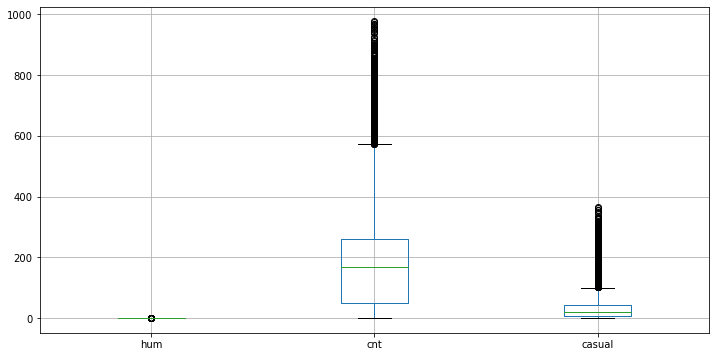

In [20]:
# plotando o boxplot 
colunas = ["hum", "cnt", "casual"]
df_bike.boxplot(column=colunas, figsize=(12, 6))

## Explorando os Dados

Text(0.5, 1.0, 'Distribuição das bikes pela feature season')

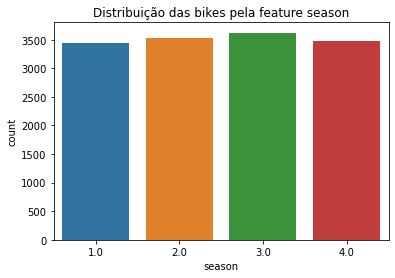

In [25]:
# analisando a distribuição das bikes pela feature season
sns.countplot(x="season", data=df_bike)
plt.title("Distribuição das bikes pela feature season")

In [26]:
# verificando a quantidade de valores da coluna season
df_bike["season"].value_counts()

3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

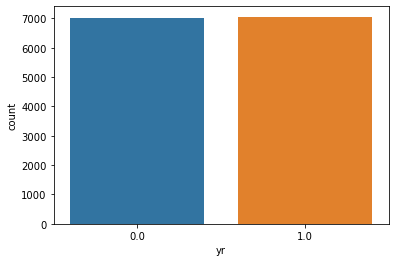

In [27]:
# analisando a distribuição das bikes pela feature yr
sns.countplot(x="yr", data=df_bike)

In [28]:
# verficando a quantidade dos valores da coluna yr
df_bike["yr"].value_counts()

1.0    7060
0.0    7016
Name: yr, dtype: int64

<Figure size 1008x432 with 0 Axes>

Text(0.5, 1.0, 'Distribuição das bikes pela feature mnth')

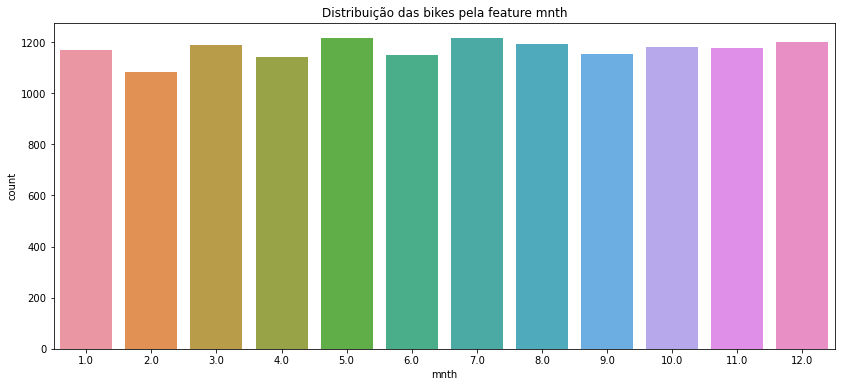

In [40]:
# analisando a distribuição das bikes pela feature mnth
plt.figure(figsize=(14, 6))
sns.countplot(x="mnth", data=df_bike)
plt.title("Distribuição das bikes pela feature mnth")

In [29]:
# verificando a quantidade dos valores da coluna mnth
df_bike["mnth"].value_counts()

7.0     1215
5.0     1215
12.0    1201
8.0     1193
3.0     1188
10.0    1179
11.0    1176
1.0     1168
9.0     1155
6.0     1148
4.0     1140
2.0     1084
Name: mnth, dtype: int64

<Figure size 1008x288 with 0 Axes>

Text(0.5, 1.0, 'Distribuição das bikes pela feature hr')

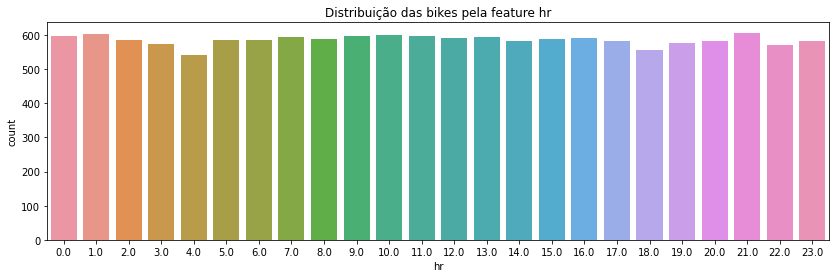

In [42]:
# analisando a distribuição das bikes pela feature hr
plt.figure(figsize=(14, 4))
sns.countplot(x="hr", data=df_bike)
plt.title("Distribuição das bikes pela feature hr")

In [35]:
# verificando a quantidade dos valores da feature hr
df_bike["hr"].value_counts()

21.0    607
1.0     603
10.0    600
0.0     598
9.0     597
11.0    596
7.0     595
13.0    593
12.0    592
16.0    592
8.0     590
15.0    589
2.0     586
5.0     586
6.0     586
20.0    584
14.0    584
17.0    584
23.0    584
19.0    578
3.0     574
22.0    572
18.0    557
4.0     541
Name: hr, dtype: int64

Text(0.5, 1.0, 'Distribuição das bikes pela feature holiday')

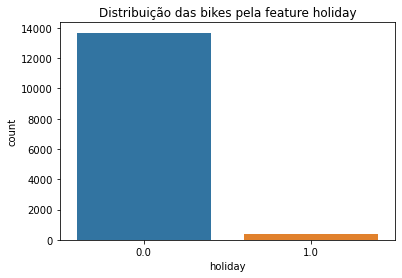

In [45]:
# analisando a distribuição das bikes pela feature holiday
sns.countplot(x="holiday", data=df_bike)
plt.title("Distribuição das bikes pela feature holiday")

In [43]:
# verificando a quantidade dos valores da feature holiday
df_bike["holiday"].value_counts()

0.0    13686
1.0      390
Name: holiday, dtype: int64

Text(0.5, 1.0, 'Distribuição das bikes pela feature weekday')

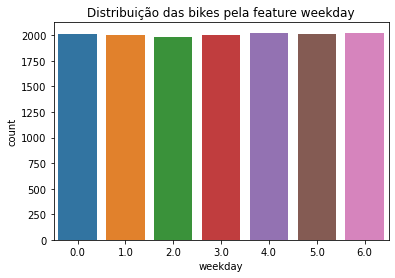

In [47]:
# analisando a distribuição das bikes pela feature weekday
sns.countplot(x="weekday", data=df_bike)
plt.title("Distribuição das bikes pela feature weekday")

In [46]:
# verficando a quantidade dos valores da feature weekday
df_bike["weekday"].value_counts()

6.0    2026
4.0    2020
5.0    2018
0.0    2014
3.0    2008
1.0    2008
2.0    1984
Name: weekday, dtype: int64

In [72]:
count = df_bike["weekday"].value_counts

Text(0.5, 1.0, 'Distribuição das bikes pela feature workingday')

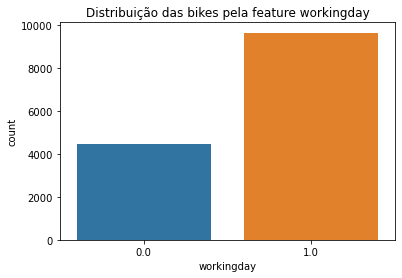

In [49]:
# analisando a distribuição das bikes pela feature workingday
sns.countplot(x="workingday", data=df_bike)
plt.title("Distribuição das bikes pela feature workingday")

In [50]:
# verificando a quantidade dos valores da feature workingday
df_bike["workingday"].value_counts()

1.0    9629
0.0    4468
Name: workingday, dtype: int64

Text(0.5, 1.0, 'Distribuição das bikes pela feature weathersit')

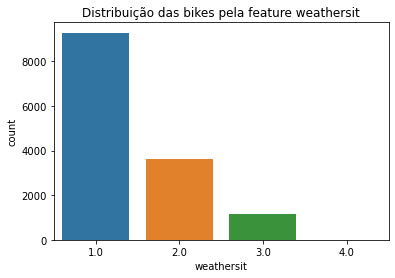

In [52]:
# analisando a distribuição das bikes pela feature weathersit
sns.countplot(x="weathersit", data=df_bike)
plt.title("Distribuição das bikes pela feature weathersit")

In [53]:
# verificando a quantidade dos valores da feature weathersit
df_bike["weathersit"].value_counts()

1.0    9285
2.0    3641
3.0    1150
4.0       2
Name: weathersit, dtype: int64

In [84]:
for c in df_bike["weathersit"].value_counts():
    res = c / df_bike["weathersit"].count()
    print(c, res)

9285 0.6595397073447933
3641 0.2586304872851257
1150 0.08168773973575792
2 0.00014206563432305724


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E85167B8>]],
      dtype=object)

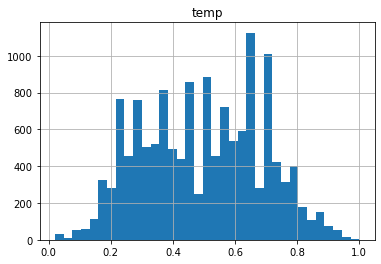

In [55]:
# analisando a distribuição das bikes pela feature temp
df_bike.hist("temp", bins=35)
plt.title("Distribuição das bikes pela feature temp")

In [54]:
# verificando a quantidade dos valores da feature temp
df_bike["temp"].value_counts()

0.62    593
0.66    567
0.64    558
0.70    558
0.60    536
0.34    521
0.30    519
0.36    518
0.32    506
0.40    492
0.56    476
0.54    457
0.26    457
0.52    456
0.72    454
0.46    442
0.42    440
0.50    430
0.24    422
0.74    421
0.44    415
0.22    342
0.76    315
0.38    294
0.20    283
0.68    282
0.80    264
0.48    250
0.58    243
0.28    240
0.16    192
0.82    180
0.78    139
0.18    131
0.14    113
0.84    110
0.86    106
0.90     73
0.12     61
0.88     44
0.10     40
0.92     40
0.02     17
0.08     15
0.96     14
0.04     14
0.94     12
0.06     12
0.98      1
1.00      1
Name: temp, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E8602FD0>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição das bikes pela feature atemp')

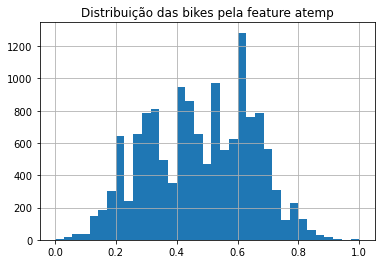

In [57]:
# analisando a distribuição das bikes pela feature atemp
df_bike.hist("atemp", bins=35)
plt.title("Distribuição das bikes pela feature atemp")

In [58]:
# verificando a quantidade dos valores da feature atemp
df_bike["atemp"].value_counts()

0.6212    806
0.4091    503
0.5152    496
0.3333    481
0.6061    477
0.5303    474
0.6667    472
0.5000    467
0.4242    442
0.4545    439
0.3030    436
0.4394    418
0.4848    413
0.5455    402
0.6515    390
0.2273    388
0.6364    372
0.3485    351
0.2879    348
0.6970    347
0.2576    331
0.5909    331
0.3182    329
0.2727    322
0.6818    313
0.3939    293
0.5758    291
0.2121    257
0.4697    241
0.2424    240
0.7121    213
0.1970    178
0.7424    157
0.5606    155
0.7273    149
0.3636    143
0.1818    127
0.7576    123
0.7727    116
0.7879    110
0.1515    107
0.1667     80
0.1364     74
0.8030     72
0.1212     71
0.3788     61
0.8182     58
0.8333     37
0.1061     31
0.8485     25
0.0758     22
0.8636     19
0.8788     12
0.8939     12
0.0606     11
0.0455      8
0.0303      8
0.0909      8
0.9091      5
0.0152      4
0.9242      4
0.9848      2
0.0000      2
0.9545      1
1.0000      1
Name: atemp, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E8841B00>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição das bikes pela feature hum')

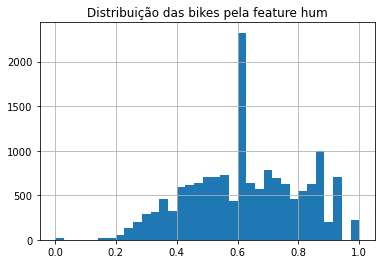

In [64]:
# analisando a distribuição das bikes pela feature hum
df_bike.hist("hum", bins=35)
plt.title("Distribuição das bikes pela feature hum")

In [59]:
# verificando a quantidade dos valores da feature hum
df_bike["hum"].value_counts()

0.627357    1571
0.880000     537
0.830000     530
0.940000     433
0.870000     396
0.700000     349
0.650000     323
0.660000     302
0.740000     286
0.550000     285
0.690000     277
0.490000     275
0.930000     275
0.610000     270
0.770000     268
0.620000     268
0.730000     264
0.780000     264
0.560000     255
0.520000     250
0.460000     247
0.820000     241
0.540000     236
0.590000     228
0.810000     226
0.410000     224
1.000000     220
0.500000     218
0.430000     217
0.530000     216
0.600000     215
0.510000     213
0.470000     205
0.580000     204
0.440000     201
0.450000     200
0.890000     195
0.790000     193
0.480000     190
0.420000     188
0.570000     187
0.370000     184
0.760000     181
0.640000     178
0.400000     177
0.750000     175
0.390000     172
0.710000     160
0.380000     153
0.360000     146
0.720000     146
0.630000     135
0.330000     135
0.670000     133
0.680000     133
0.350000     128
0.340000     103
0.310000     100
0.300000      

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E88D7EB8>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição das bikes pela feature windspeed')

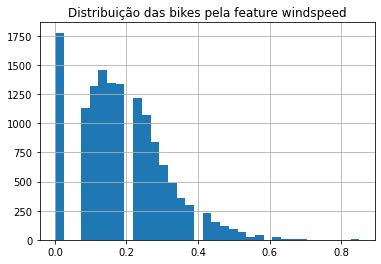

In [65]:
# analisando a distribuição das bikes pela feature windspeed
df_bike.hist("windspeed", bins=35)
plt.title("Distribuição das bikes pela feature windspeed")

In [60]:
# verificando a quantidade dos valores da feature windspeed
df_bike["windspeed"].value_counts()

0.0000    1779
0.1343    1458
0.1642    1348
0.1940    1337
0.1045    1321
0.2239    1222
0.0896    1136
0.2537    1068
0.2836     841
0.2985     645
0.3284     487
0.3582     363
0.3881     298
0.4179     234
0.4478     150
0.4627     119
0.4925      90
0.5224      69
0.5821      37
0.5522      28
0.6119      20
0.6418      11
0.6567       9
0.6866       3
0.7164       2
0.7463       2
0.8507       2
0.8060       1
0.8358       1
0.7761       1
Name: windspeed, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E89E6A20>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição das bikes pela feature casual')

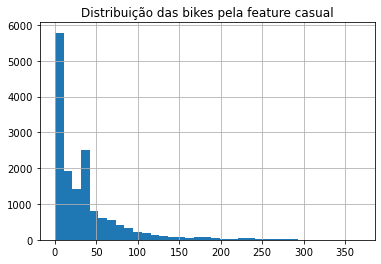

In [66]:
# analisando a distribuição das bikes pela feature casual
df_bike.hist("casual", bins=35)
plt.title("Distribuição das bikes pela feature casual")

In [61]:
# verificando a quantidade dos valores da feature casual
df_bike["casual"].value_counts()

35.416317     1570
0.000000      1303
1.000000       885
2.000000       646
3.000000       567
4.000000       460
5.000000       400
6.000000       355
7.000000       329
8.000000       292
9.000000       287
10.000000      257
12.000000      253
11.000000      244
13.000000      201
14.000000      187
17.000000      180
16.000000      175
15.000000      175
18.000000      170
19.000000      164
20.000000      163
27.000000      157
21.000000      143
31.000000      140
24.000000      134
25.000000      127
29.000000      126
33.000000      120
28.000000      119
30.000000      118
23.000000      118
26.000000      118
22.000000      115
32.000000      103
34.000000      103
40.000000       97
36.000000       92
42.000000       91
41.000000       89
35.000000       88
39.000000       87
38.000000       85
49.000000       83
37.000000       80
51.000000       78
48.000000       75
44.000000       73
47.000000       72
56.000000       71
50.000000       70
55.000000       69
45.000000   

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E8B9C2B0>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição das bikes pela feature registered')

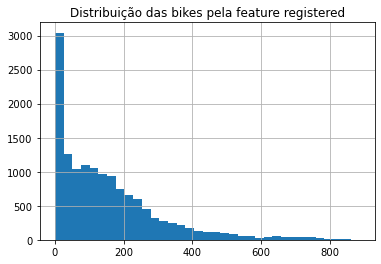

In [67]:
# analisando a distribuição das bikes pela feature registered
df_bike.hist("registered", bins=35)
plt.title("Distribuição das bikes pela feature registered")

In [62]:
# verificando a quantidade dos valores da feature registered
df_bike["registered"].value_counts()

4.0      264
3.0      236
5.0      235
6.0      218
2.0      193
1.0      166
7.0      166
8.0      146
9.0      145
11.0     115
10.0     101
19.0      88
22.0      82
13.0      80
15.0      79
14.0      76
16.0      76
20.0      75
23.0      74
17.0      74
21.0      72
24.0      70
30.0      67
12.0      66
18.0      64
31.0      63
25.0      63
26.0      62
49.0      58
88.0      57
48.0      57
104.0     57
28.0      57
32.0      57
39.0      54
64.0      54
95.0      54
53.0      54
29.0      53
79.0      53
34.0      53
35.0      52
43.0      52
127.0     52
155.0     51
108.0     51
107.0     50
86.0      50
27.0      50
112.0     49
150.0     49
71.0      49
130.0     49
46.0      49
33.0      48
156.0     48
41.0      48
161.0     48
99.0      48
72.0      48
115.0     48
116.0     48
50.0      47
111.0     47
119.0     47
55.0      47
137.0     46
97.0      46
80.0      46
121.0     46
40.0      46
37.0      45
83.0      45
67.0      45
168.0     44
142.0     44
36.0      44

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000298E8C5D240>]],
      dtype=object)

Text(0.5, 1.0, 'Distribuição das bikes pela feature cnt')

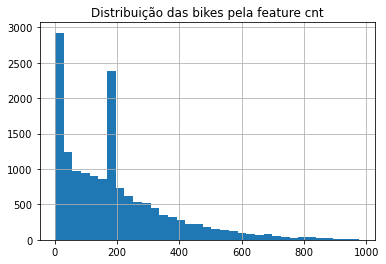

In [68]:
# analisando a distribuição das bikes pela feature cnt
df_bike.hist("cnt", bins=35)
plt.title("Distribuição das bikes pela feature cnt")

In [63]:
# verificando a quantidade dos valores da feature cnt
df_bike["cnt"].value_counts()

189.16585    1562
5.00000       209
4.00000       194
6.00000       188
3.00000       180
2.00000       170
7.00000       156
8.00000       151
1.00000       129
10.00000      122
11.00000      117
9.00000       104
12.00000       95
13.00000       91
16.00000       87
14.00000       79
17.00000       78
21.00000       78
20.00000       75
28.00000       71
26.00000       68
23.00000       67
18.00000       66
15.00000       64
25.00000       61
24.00000       60
31.00000       60
19.00000       59
32.00000       57
34.00000       53
33.00000       53
22.00000       53
64.00000       53
36.00000       52
35.00000       52
27.00000       52
40.00000       52
29.00000       51
69.00000       50
37.00000       49
30.00000       48
41.00000       48
84.00000       45
45.00000       45
90.00000       45
95.00000       44
123.00000      44
47.00000       44
55.00000       44
86.00000       44
42.00000       43
93.00000       43
124.00000      43
54.00000       43
62.00000       42
114.00000 

### Observações
- Temos um dataset equilibrado.
- Season:
    - 1.0: 3437 valores (24%)
    - 2.0: 3523 valores (25%)
    - 3.0: 3623 valores (26%)
    - 4.0: 3478 valores (25%)
- Yr:
    - 0.0: 7016 valores (49%)
    - 1.0: 7060 valores (51%)
- Mnth:
    - 1.0: 1168 valores (8,30%)
    - 2.0: 1084 valores (7,70%)
    - 3.0: 1188 valores (8,44%)
    - 4.0: 1140 valores (8,10%)
    - 5.0: 1215 valores (8,64%)
    - 6.0: 1148 valores (8,16%)
    - 7.0: 1215 valores (8,64%)
    - 8.0: 1193 valores (8,48%)
    - 9.0: 1155 valores (8,21%)
    - 10.0: 1179 valores (8,38%)
    - 11.0: 1176 valores (8,36%)
    - 12.0: 1201 valores (8,54%)
- Hr: A maior hora é 21 horas com 607 registros
- Holiday:
    - 0.0: 13686 valores (97%)
    - 1.0: 390 valores (3%)
- Weekday:
    - 0.0: 2014 valores (14,30%)
    - 1.0: 2008 valores (14,26%)
    - 2.0: 1984 valores (14,09%)
    - 3.0: 2008 valores (14,26%)
    - 4.0: 2020 valores (14,34%)
    - 5.0: 2018 valores (14,33%)
    - 6.0: 2026 valores (14,39%)
- Workingday:
    - 0.0: 4468 valores (31,69%)
    - 1.0: 9629 valores (68,31%)
- Weathersit:
    - 1.0: 9285 valores (65,95%)
    - 2.0: 3641 valores (25,86%)
    - 3.0: 1150 valores (8,16%)
    - 4.0: 2 valores (0,01%)

## Separando os Dados

In [86]:
# criando um dataset filtrando os valores necessários ('hum','casual', 'cnt')
df_bike_filtrado = df_bike[["hum", "casual", "cnt"]]
df_bike_filtrado.head()

,hum,casual,cnt
1,0.80,8.0,40.0
2,0.80,5.0,32.0
3,0.75,3.0,13.0
4,0.75,0.0,1.0
5,0.75,0.0,1.0


In [99]:
# verficando se existe valor nulo
df_bike_filtrado.isnull().sum()

hum       0
casual    0
cnt       0
dtype: int64

In [89]:
# selecionando as variáveis para os modelos de regressão 
X = df_bike_filtrado.iloc[:, :-1]
y = df_bike_filtrado.iloc[:, -1]

In [90]:
# mostrando a dimensão do X
X.shape

(15641, 2)

In [91]:
# mostrando a dimensão do y
y.shape

(15641,)

## Regressão Linear

In [101]:
# criando o objeto do regressor
lin_reg = LinearRegression()

# treinando o modelo
lin_reg.fit(X, y)

# realiza a previsão
y_pred = lin_reg.predict(X)

LinearRegression()

In [102]:
# criando as métricas
mean_abs = mean_absolute_error(y, y_pred)
mean_squ = mean_squared_error(y, y_pred)
median_abs = median_absolute_error(y, y_pred)
coef_R2 = r2_score(y, y_pred)

In [103]:
# mostrando as métricas 
print('Mean Abs Error:   {0}'.format(round(mean_abs, 2)))
print('Mean Squ Error:   {0}'.format(round(mean_squ, 2)))
print('Median Abs Error: {0}'.format(round(median_abs, 2)))
print('Coef Determin R2: {0}'.format(round(coef_R2, 2)))
print('Coef Angular:     {0}'.format(lin_reg.coef_))
print('Coef Linear:      {0}'.format(lin_reg.intercept_))

Mean Abs Error:   93.26
Mean Squ Error:   17559.12
Median Abs Error: 73.68
Coef Determin R2: 0.41
Coef Angular:     [-99.75012328   2.21512197]
Coef Linear:      173.2933750513558


## Árvore de Decisão

In [96]:
# criando o objeto do regressor
tree_reg = DecisionTreeRegressor()

# treinando o modelo
tree_reg.fit(X, y)

# fazendo a previsão
y_pred = tree_reg.predict(X)\

DecisionTreeRegressor()

In [97]:
# criando as métricas
mean_abs = mean_absolute_error(y, y_pred)
mean_squ = mean_squared_error(y, y_pred)
median_abs = median_absolute_error(y, y_pred)
coef_R2 = r2_score(y, y_pred)

In [98]:
# mostrando as métricas 
print('Mean Abs Error:   {0}'.format(round(mean_abs, 2)))
print('Mean Squ Error:   {0}'.format(round(mean_squ, 2)))
print('Median Abs Error: {0}'.format(round(median_abs, 2)))
print('Coef Determin R2: {0}'.format(round(coef_R2, 2)))
print('Coef Angular:     {0}'.format(lin_reg.coef_))
print('Coef Linear:      {0}'.format(lin_reg.intercept_))

Mean Abs Error:   58.55
Mean Squ Error:   8577.34
Median Abs Error: 34.91
Coef Determin R2: 0.71
Coef Angular:     [-99.75012328   2.21512197]
Coef Linear:      173.2933750513558


### Observações
- Filtramos o dataset com as features hum, casual e cnt
- Verificamos se existe valores nulos, e não tinha nenhum.
- Definimos as variáveis de entrada X (hum, casual) e de saída y (cnt)
- Mostramos a dimensão de X e y.
- Linear Regression:
    - Criamos o objeto do modelo de regressão
    - Treinamos o modelo
    - Realizamos a previsão
    - Criamos e mostramos as métricas de avaliação
        * Mean Abs Error:   93.26
        * Mean Squ Error:   17559.12
        * Median Abs Error: 73.68
        * Coef Determin R2: 0.41
        * Coef Angular:     [-99.75012328  2.21512197]
        * Coef Linear:      173.2933750513558
- Árvore de Decisão:
    - Criamos o objeto do modelo de regressão
    - Treinamos o modelo
    - Realizamos a previsão
    - Criamos e mostramos as métricas de avaliação
	* Mean Abs Error:   58.55
	* Mean Squ Error:   8577.34
	* Median Abs Error: 34.91
	* Coef Determin R2: 0.71
	* Coef Angular:     [-99.75012328   2.21512197]
	* Coef Linear:      173.2933750513558

# Questionario

**Pergunta 1:** No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?
- (15,1345) 
- **(17379,17)** 
- (1345,15) 
- (17,17379) 
 
**Pergunta 2:** Quantos tipos diferentes de dados existem no dataset do desafio?
- 3 
- 17 
- **2** 
- 12 
 
**Pergunta 3:** Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?
- 0% 
- **10%**
- 5% 
- 15% 
 
**Pergunta 4:** Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?
- (17,15641) 
- (17379,17) 
- (17,17379) 
- **(15641,17)**
 
**Pergunta 5:** Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?
- **0,496**
- 0,192 
- 1,192 
- 0,156 

**Pergunta 6:** Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?
- **0,122**
- 0,189 
- 0,192 
- 1,122 
 
**Pergunta 7:** Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?
- 3
- **4** 
- 1 
- 2 
 
**Pergunta 8:** Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?
- 2014-12-31 
- 2012-01-31 
- 2012-01-31 
- **2012-12-31**
 
**Pergunta 9:** Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?
- Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot. 
- Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot. 
- Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot. 
- **Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.** 

**Pergunta 10:** Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:
- Possuem baixa correlação linear positiva. 
- **Possuem baixa correlação linear negativa.**
- Possuem alta correlação linear negativa. 
- Possuem alta correlação linear positiva. 
 
**Pergunta 11:** Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.
- -0.80 
-  0.80 
-  **0.40** 
- -0.40 
 
**Pergunta 12:** Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".
- **0,70** 
- 0,30 
- 0,40 
- 1,00 

**Pergunta 13:** Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:
- **O valor obtido pela árvore de decisão como regressor apresenta maior R2**
- Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos. 
- O valor encontrado pela árvore de decisão foi negativo. 
- O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão. 
 
**Pergunta 14:** Com base na árvore de decisão é CORRETO afirmar:
- Ávore de Decisão é utilizada apenas para a classificação de dados contínuos. 
- Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão. 
- **Pode ser utilizada para classificação e regressão.**
- A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos. 
 
**Pergunta 15:** Comparando o SVM com a árvore de decisão é CORRETO afirmar:
- Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM. 
- Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes. 
- **SVM encontra o hiperplano que gera a maior separação entre os dados.** 
- SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.